## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
df = pd.read_csv('int_prof.csv')
df['Non_Technical_or_Technical'] = df['Non_Technical_or_Technical'].replace(['Non Technical'], 'Non_Technical')
df.head()

,Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,...,reading_and _writing_skills,memory_capability_score,interested_career_area,Type_of_company_want_to_settle_in,Interested_Type_of_Books,Non_Technical_or_Technical,hard_smart_worker,worked_in_teams_ever,Introvert,Suggested_Job_Role
0,8,5,7,7,1,2,7,8,3,no,...,medium,poor,testing,BPA,Series,Technical,smart worker,yes,yes,Applications Developer
1,9,2,2,2,5,3,2,2,1,yes,...,excellent,medium,system developer,Cloud Services,Autobiographies,Technical,hard worker,no,no,Applications Developer
2,6,2,1,4,1,0,9,0,4,yes,...,excellent,poor,Business process analyst,product development,Travel,Technical,smart worker,yes,yes,Applications Developer
3,1,7,3,7,3,8,9,9,9,no,...,excellent,poor,testing,Testing and Maintainance Services,Guide,Technical,smart worker,no,yes,Applications Developer
4,7,4,1,0,5,5,8,3,1,no,...,excellent,medium,system developer,BPA,Health,Non_Technical,hard worker,yes,no,Applications Developer


In [3]:
print('Shape of data is: %s entries and %s columns'%(df.shape[0],df.shape[1]))

Shape of data is: 9902 entries and 25 columns


## Data Preprocessing

In [4]:
print("All the columns in the dataset: " , df.columns)

All the columns in the dataset:  Index(['Logical_quotient_rating', 'i_get_stressed_out_easily',
       'coding_skills_rating', 'public_speaking_points',
       'i_am_always_prepared', 'i_follow_a_schedule',
       'i_am_quick_to_understand_things', 'i_am_full_of_ideas',
       'i_start_conversations', 'do_you_like_sports',
       'entrepreneurial_mindset', 'tendency_to_worry',
       'self_learning_capability', 'Extra_courses_did',
       'Taken_inputs_from_seniors_or_elders', 'reading_and _writing_skills',
       'memory_capability_score', 'interested_career_area ',
       'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books',
       'Non_Technical_or_Technical', 'hard_smart_worker',
       'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role'],
      dtype='object')


In [5]:
print("Numeric Columns in DF: \n" , df.select_dtypes(include=np.number).columns.tolist())
print("\n\nCategorical Columns in DF: \n" , df.select_dtypes(include=['object']).columns.tolist())

Numeric Columns in DF: 
 ['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations']


Categorical Columns in DF: 
 ['do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and _writing_skills', 'memory_capability_score', 'interested_career_area ', 'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books', 'Non_Technical_or_Technical', 'hard_smart_worker', 'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role']


### No Missing Values

In [6]:
df.isnull().sum(axis=0)

Logical_quotient_rating                0
i_get_stressed_out_easily              0
coding_skills_rating                   0
public_speaking_points                 0
i_am_always_prepared                   0
i_follow_a_schedule                    0
i_am_quick_to_understand_things        0
i_am_full_of_ideas                     0
i_start_conversations                  0
do_you_like_sports                     0
entrepreneurial_mindset                0
tendency_to_worry                      0
self_learning_capability               0
Extra_courses_did                      0
Taken_inputs_from_seniors_or_elders    0
reading_and _writing_skills            0
memory_capability_score                0
interested_career_area                 0
Type_of_company_want_to_settle_in      0
Interested_Type_of_Books               0
Non_Technical_or_Technical             0
hard_smart_worker                      0
worked_in_teams_ever                   0
Introvert                              0
Suggested_Job_Ro

### Uniques Categorical Values in DF

In [7]:
cat_col = df[['do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and _writing_skills', 'memory_capability_score', 'interested_career_area ', 'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books', 'Non_Technical_or_Technical', 'hard_smart_worker', 'worked_in_teams_ever', 'Introvert', 'Suggested_Job_Role']]
for i in cat_col:
    print(df[i].value_counts(), end="\n\n")

no     4960
yes    4942
Name: do_you_like_sports, dtype: int64

no     4999
yes    4903
Name: entrepreneurial_mindset, dtype: int64

no     5034
yes    4868
Name: tendency_to_worry, dtype: int64

no     4970
yes    4932
Name: self_learning_capability, dtype: int64

yes    5054
no     4848
Name: Extra_courses_did, dtype: int64

no     4957
yes    4945
Name: Taken_inputs_from_seniors_or_elders, dtype: int64

excellent    3338
medium       3285
poor         3279
Name: reading_and _writing_skills, dtype: int64

medium       3333
excellent    3313
poor         3256
Name: memory_capability_score, dtype: int64

system developer            1701
Business process analyst    1685
security                    1667
developer                   1623
testing                     1619
cloud computing             1607
Name: interested_career_area , dtype: int64

Service Based                        1056
BPA                                  1043
Web Services                         1031
Product based      

- By using binary encoding, categorical features with yes or no can be easily converted to numerical values.

### To check data variety in Interested Type of Books columns

<AxesSubplot: xlabel='Interested_Type_of_Books', ylabel='count'>

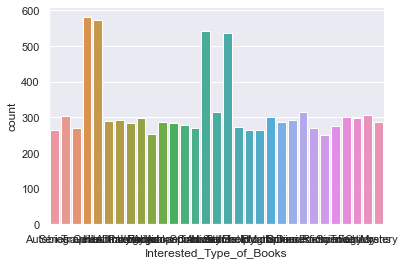

In [8]:
sns.set(rc={'figure.figsize':(50,20)})
sns.countplot(x = df["Interested_Type_of_Books"])

## EDA

### Corr Between Numerical Columns

<AxesSubplot: >

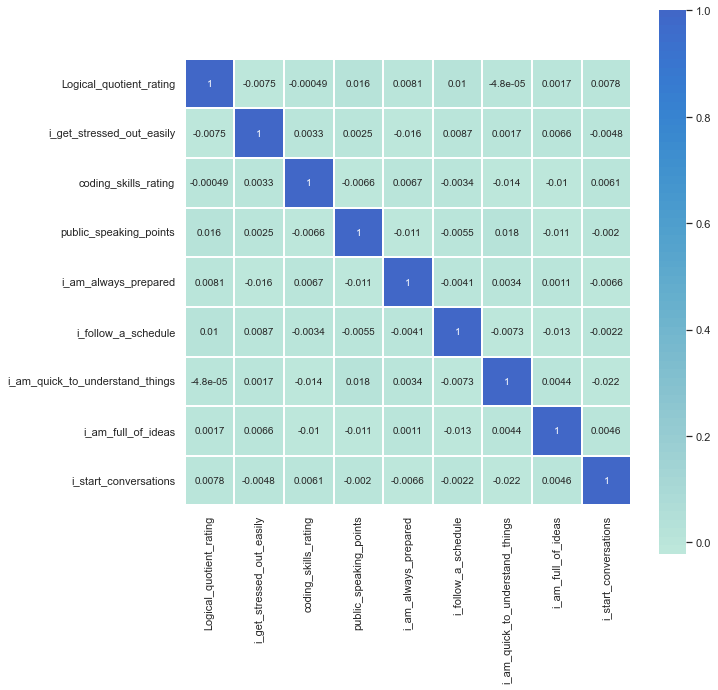

In [9]:
corr = df[['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations']].corr()
f,axes = plt.subplots(1,1,figsize = (10,10))
sns.heatmap(corr,square=True,annot = True,linewidth = .4,center = 2,ax = axes)

## Visualization for Categorical Values

In [9]:
print(df["Interested_Type_of_Books"].value_counts())

Guide                    581
Health                   574
Horror                   541
Self help                537
Science fiction          316
Satire                   314
Childrens                305
Autobiographies          304
Trilogy                  302
Biographies              302
Fantasy                  299
Prayer books             298
Diaries                  293
Anthology                292
Journals                 290
Drama                    287
Mystery                  287
Encyclopedias            286
Religion-Spirituality    285
Dictionaries             283
Action and Adventure     277
Science                  275
History                  272
Comics                   270
Travel                   270
Poetry                   269
Cookbooks                264
Math                     263
Series                   263
Art                      253
Romance                  250
Name: Interested_Type_of_Books, dtype: int64


In [11]:
print(df["Type_of_company_want_to_settle_in"].value_counts())

Service Based                        1056
BPA                                  1043
Web Services                         1031
Product based                         995
Finance                               991
Cloud Services                        984
Testing and Maintainance Services     980
product development                   959
Sales and Marketing                   949
SAaS services                         914
Name: Type_of_company_want_to_settle_in, dtype: int64


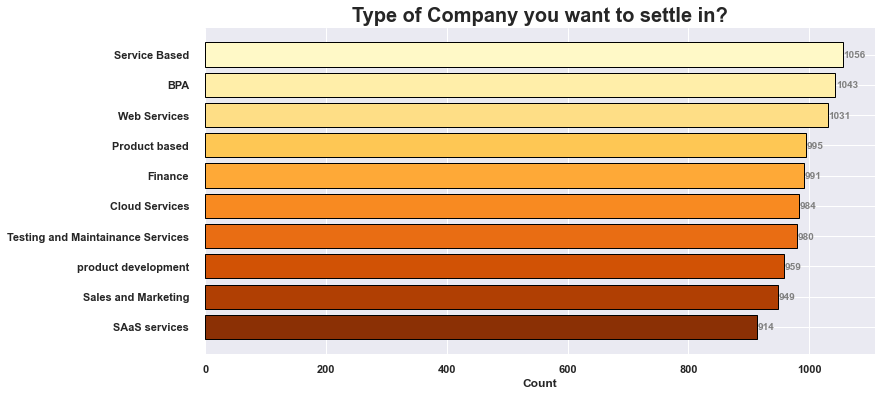

In [12]:
# Figure Size
fig, ax = plt.subplots(figsize=(12,6))

# Horizontal Bar Plot
title_cnt=df["Type_of_company_want_to_settle_in"].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Type of Company you want to settle in?',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

In [10]:
print(df["interested_career_area "].value_counts())

system developer            1701
Business process analyst    1685
security                    1667
developer                   1623
testing                     1619
cloud computing             1607
Name: interested_career_area , dtype: int64


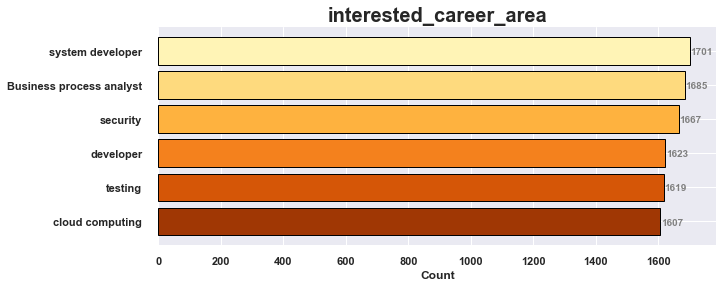

In [14]:
# Figure Size
fig, ax = plt.subplots(figsize=(10,4)) #width,height

# Horizontal Bar Plot
title_cnt=df["interested_career_area "].value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1],edgecolor='black', color=sns.color_palette('YlOrBr',len(title_cnt)))



# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)


# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('interested_career_area',weight='bold',fontsize=20)
ax.set_xlabel('Count', weight='bold')

# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+1, i.get_y()+0.5, str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')

# Show Plot
plt.show()

### Checking to see balance in the target variable

<AxesSubplot: xlabel='Suggested_Job_Role', ylabel='count'>

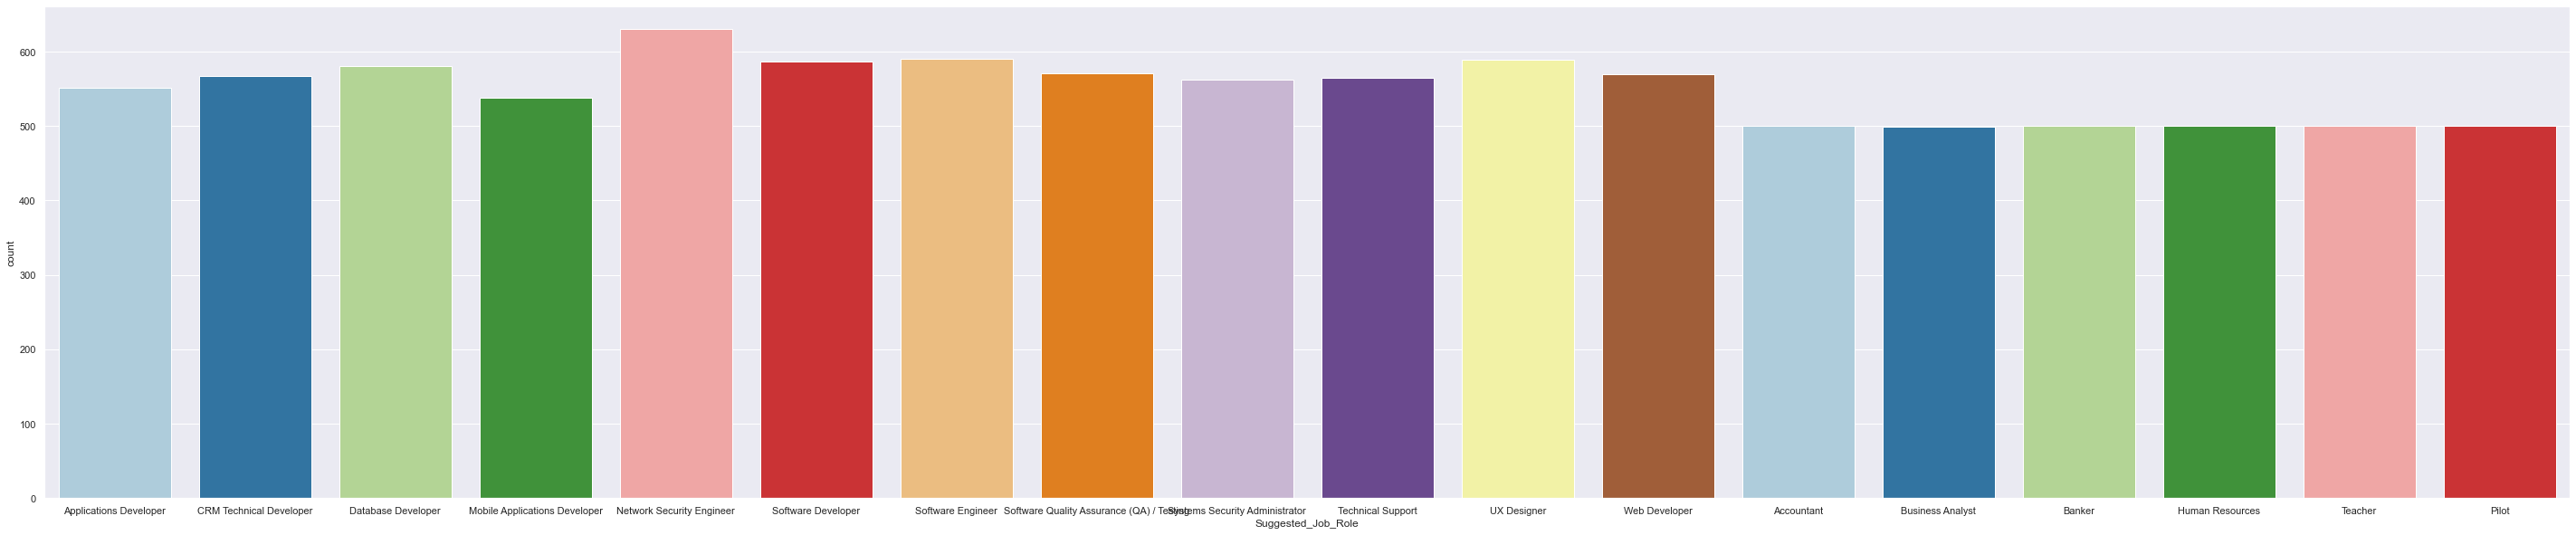

In [15]:
sns.set(rc={'figure.figsize':(50,10)})
sns.countplot(x = df["Suggested_Job_Role"], palette="Paired")

##  Feature Selection & Engineering

### Binary Encoding for Categorical Variables

In [11]:
cols = df[['do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'worked_in_teams_ever', 'Introvert']]
for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    df = df.replace(cleanup_nums)
    df.head()

In [12]:
print("\n\n Categorical Values: \n" , df.select_dtypes(include=['object']).columns.tolist())



 Categorical Values: 
 ['reading_and _writing_skills', 'memory_capability_score', 'interested_career_area ', 'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books', 'Non_Technical_or_Technical', 'hard_smart_worker', 'Suggested_Job_Role']


### One Hot Encoding For Categorical values

In [13]:
mycol = df[["reading_and _writing_skills", "memory_capability_score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    df = df.replace(cleanup_nums)

cat_col = df[['interested_career_area ', 'Type_of_company_want_to_settle_in', 'Interested_Type_of_Books']]
for i in cat_col:
    df[i] = df[i].astype('category')
    df[i + "_code"] = df[i].cat.codes

print("\n\nList of Categorical values: \n" , df.select_dtypes(include=['object']).columns.tolist())



List of Categorical values: 
 ['Non_Technical_or_Technical', 'hard_smart_worker', 'Suggested_Job_Role']


In [14]:
df.head(5)

,Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,...,Type_of_company_want_to_settle_in,Interested_Type_of_Books,Non_Technical_or_Technical,hard_smart_worker,worked_in_teams_ever,Introvert,Suggested_Job_Role,interested_career_area _code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code
0,8,5,7,7,1,2,7,8,3,0,...,BPA,Series,Technical,smart worker,1,1,Applications Developer,5,0,28
1,9,2,2,2,5,3,2,2,1,1,...,Cloud Services,Autobiographies,Technical,hard worker,0,0,Applications Developer,4,1,3
2,6,2,1,4,1,0,9,0,4,1,...,product development,Travel,Technical,smart worker,1,1,Applications Developer,0,9,29
3,1,7,3,7,3,8,9,9,9,0,...,Testing and Maintainance Services,Guide,Technical,smart worker,0,1,Applications Developer,5,7,13
4,7,4,1,0,5,5,8,3,1,0,...,BPA,Health,Non_Technical,hard worker,1,0,Applications Developer,4,0,14


###  DV Encoding

In [15]:
print(df['Non_Technical_or_Technical'].unique())
print(df['hard_smart_worker'].unique())

['Technical' 'Non_Technical']
['smart worker' 'hard worker']


In [16]:
df = pd.get_dummies(df, columns=["Non_Technical_or_Technical", "hard_smart_worker"], prefix=["A", "B"])
df.head()

,Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,...,worked_in_teams_ever,Introvert,Suggested_Job_Role,interested_career_area _code,Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code,A_Non_Technical,A_Technical,B_hard worker,B_smart worker
0,8,5,7,7,1,2,7,8,3,0,...,1,1,Applications Developer,5,0,28,0,1,0,1
1,9,2,2,2,5,3,2,2,1,1,...,0,0,Applications Developer,4,1,3,0,1,1,0
2,6,2,1,4,1,0,9,0,4,1,...,1,1,Applications Developer,0,9,29,0,1,0,1
3,1,7,3,7,3,8,9,9,9,0,...,0,1,Applications Developer,5,7,13,0,1,0,1
4,7,4,1,0,5,5,8,3,1,0,...,1,0,Applications Developer,4,0,14,1,0,1,0


In [17]:
df.to_csv('test.csv')

In [18]:
print("List of Numerical values: \n" , df.select_dtypes(include=np.number).columns.tolist())

List of Numerical values: 
 ['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations', 'do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and _writing_skills', 'memory_capability_score', 'worked_in_teams_ever', 'Introvert', 'interested_career_area _code', 'Type_of_company_want_to_settle_in_code', 'Interested_Type_of_Books_code', 'A_Non_Technical', 'A_Technical', 'B_hard worker', 'B_smart worker']


## Machine Learning Models to get best accuracy

In [20]:
feed = df[['Logical_quotient_rating', 'i_get_stressed_out_easily', 'coding_skills_rating', 'public_speaking_points', 'i_am_always_prepared', 'i_follow_a_schedule', 'i_am_quick_to_understand_things', 'i_am_full_of_ideas', 'i_start_conversations', 'do_you_like_sports', 'entrepreneurial_mindset', 'tendency_to_worry', 'self_learning_capability', 'Extra_courses_did', 'Taken_inputs_from_seniors_or_elders', 'reading_and _writing_skills', 'memory_capability_score', 'worked_in_teams_ever', 'Introvert', 'interested_career_area _code', 'Type_of_company_want_to_settle_in_code', 'Interested_Type_of_Books_code', 'A_Non_Technical', 'A_Technical', 'B_hard worker', 'B_smart worker','Suggested_Job_Role']]

# Choosing independent vars
df_train_x = feed.drop('Suggested_Job_Role',axis = 1)

# Choosing all target vars
df_train_y = feed['Suggested_Job_Role']

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.10, random_state=42)

In [21]:
y_train = pd.DataFrame(y_train, columns = ["Suggested_Job_Role"])
y_train.head()
y_test = pd.DataFrame(y_test, columns = ["Suggested_Job_Role"])
y_test

,Suggested_Job_Role
3058,Software Developer
8188,Banker
1509,Database Developer
4993,Systems Security Administrator
9493,Pilot
...,...
2588,Network Security Engineer
4181,Software Quality Assurance (QA) / Testing
5106,Systems Security Administrator
1372,Database Developer


### 1. Decision Tree


In [22]:
dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(x_train, y_train)

y_pred = dtree.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[ 2  2  0  2  2  4  0  3  5  2  2  3  2  2  1  2  7  2]
 [ 2  0  4  3  4  6  3  5  3  4  6  5  1  8  4  3  4  4]
 [ 3  4  1  2  6  4  2  2  2  0  3  2  1  5  3  2  1  4]
 [ 4  1  3  3  2  2  2  3  3  5  1  4  1  3  1  1  3  2]
 [ 7  3  3  2  3  3  2  4  7  1  6  1  2  3  0  4  4  1]
 [ 4  0  1  5  4  2  3  4  4  1  4  3  5  4  1  0  5  4]
 [ 5  2  1  5  2  1  5  3  1  2  1  3  2  2  2  3  3  3]
 [ 2  3  2  2  3  2  2  1  2  3  4  4  4  5  0  4  3  1]
 [ 3  1  3  4  6  2  5  3  5  3  3  2  4  3  6  6  5  3]
 [ 3  5  6  1  2  2  3  2  3  4  5  4  2  6  0  4  2  5]
 [ 3  2  5  3  4  4  2  3  3  2  2  3 10  3  2  3  4  6]
 [ 1  2  6  3  5  5  3  2  3  4  3  5  3  5  3  0  7  2]
 [ 2  6  1  3  1  4  2  4  3  2  4  2  5  2  1  2  3  2]
 [ 1  2  3  2  3  4  3  7  2  1  5  8  2  4  1  6  5  0]
 [ 2  1  1  3  2  4  1  2  4  3  3  4  3  3  1  4  5  5]
 [ 6  1  2  4  5  4  2  2  1  1  6  2 10  1  1  4  3  8]
 [ 1  5  4  4  2  7  3  3  4  2  2  3  2  0  1  2  4  2]
 [ 4  6  1  

In [23]:
userdata = [['8','7','3','4','5','5','6','3','8','1','1','1','1','1','1','2','2','1','1','4','5','8','1','1','1','1']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Business Analyst']
Probabilities of all classes:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


### Data for single instance prediction

In [24]:
userdata = [['8','7','3','4','5','5','6','3','8','1','1','1','1','1','1','2','2','1','1','4','5','8','1','1','1','1']]
ynewclass = dtree.predict(userdata)
ynew = dtree.predict_proba(userdata)
print(ynewclass)
print("Probabilities of all classes: ", ynew)
print("Probability of Predicted class : ", np.max(ynew))

['Business Analyst']
Probabilities of all classes:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Probability of Predicted class :  1.0


## The Best Accuracy with a 70/30 split is given by the Random Forest Model.

In [25]:
import pickle 
pickle.dump(dtree,open('interest_profiler_model.pkl','wb'))

In [1]:
from flask import Flask, request, jsonify, render_template
from flask_cors import cross_origin
import sklearn
import pickle
import pandas as pd


app = Flask(__name__)
model = pickle.load(open("predict.pkl", "rb"))


@app.route("/")
@cross_origin()
def home():
    return render_template("home.html")

@app.route("/predict", methods = ["GET", "POST"])
@cross_origin()
def predict():
    if request.method == "POST":      
      
    #   Receive inputs from Post req
        print('made inside post req')
        content = request.json
        print(content)

#        Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,
# i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,
# entrepreneurial_mindset,tendency_to_worry,self_learning_capability,Extra_courses_did,Taken_inputs_from_seniors_or_elders,
# reading_and_writing_skills,memory_capability_score,worked_in_teams_ever,Introvert,interested_career_area_code,
# Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code,A_Non_Technical,A_Technical,B_hard_worker,B_smart_worker  

        prediction=model.predict([[
            content["Logical_quotient_rating"],content["i_get_stressed_out_easily"], content["coding_skills_rating"], 
            content["public_speaking_points"], content["i_am_always_prepared"], content["i_follow_a_schedule"], 
            content["i_am_quick_to_understand_things"], content["i_am_full_of_ideas"], content["i_start_conversations"], 
            content["do_you_like_sports"],
            content["entrepreneurial_mindset"], 
            content["tendency_to_worry"], content["self_learning_capability"], 
            content["Extra_courses_did"], content["Taken_inputs_from_seniors_or_elders"], 
            
            content["reading_and_writing_skills"], content["memory_capability_score"], 
            content["worked_in_teams_ever"],  content["Introvert"], content["interested_career_area_code"],
             content["Type_of_company_want_to_settle_in_code"],  content["Interested_Type_of_Books_code"], 
            content["A_Non Technical"],
              content["A_Technical"], 
             content["B_hard_worker"] , 
            content["B_smart_worker"]
            
          
           
            
             
             
        ]])

        print("===========================")
        print(prediction)
        print(prediction[0])
        print("===========================")
            
        return prediction[0]

        prediction=model.predict([[
            Logical_quotient_rating, coding_skills_rating, hackathons, public_speaking_points,
           self_learning_capability,Extra_courses_did, 
           Taken_inputs_from_seniors_or_elders, worked_in_teams_ever, Introvert, reading_and_writing_skills,
           memory_capability_score,  
           B_hard_worker,B_smart_worker, A_Management, A_Technical, Interested_subjects_code, 
           Interested_Type_of_Books_code, certifications_code, 
           workshops_code, Type_of_company_want_to_settle_in_code,  interested_career_area_code
            
        ]])

        output=(prediction[0],2)
        
        print(output)

        return jsonify(output)

    return render_template('home.html',prediction_text="The Course for you is. {}".format(output))


    return render_template("home.html")



if __name__ == "__main__":
     app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Nov/2022 23:08:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2022 23:08:13] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [28/Nov/2022 23:08:13] "GET /static/css/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [28/Nov/2022 23:08:16] "POST /predict HTTP/1.1" 400 -
127.0.0.1 - - [28/Nov/2022 23:08:16] "POST /predict HTTP/1.1" 400 -
127.0.0.1 - - [28/Nov/2022 23:08:16] "POST /predict HTTP/1.1" 400 -


made inside post req
made inside post req
made inside post req


In [4]:
from flask import Flask, request, render_template
from flask_cors import cross_origin
import sklearn
import pickle
import pandas as pd


app = Flask(__name__)
model = pickle.load(open("predict.pkl", "rb"))


@app.route("/")
@cross_origin()
def home():
    return render_template("home.html")

@app.route("/predict", methods = ["GET", "POST"])
@cross_origin()
def predict():
    if request.method == "POST":       

 ###################   Logical_quotient_rating   #################################        
        Logical_quotient_rating = request.form["Logical_quotient_rating"]
        if (Logical_quotient_rating == 1):
            Logical_quotient_rating = 1

        
        elif (Logical_quotient_rating == 2):
            Logical_quotient_rating = 2
        elif (Logical_quotient_rating == 3):
            Logical_quotient_rating = 3
        elif (Logical_quotient_rating == 4):
            Logical_quotient_rating = 4
        elif (Logical_quotient_rating == 5):
            Logical_quotient_rating = 5
        elif (Logical_quotient_rating == 6):
            Logical_quotient_rating = 6
        elif (Logical_quotient_rating == 7):
            Logical_quotient_rating = 7
        elif (Logical_quotient_rating == 8):
            Logical_quotient_rating = 8
        elif (Logical_quotient_rating == 9):
            Logical_quotient_rating = 9           


        else:
            Logical_quotient_rating = 0
            

            
 ###################   coding_skills_rating   #################################                    

        coding_skills_rating = request.form["coding_skills_rating"]
        if (coding_skills_rating == 1):
            coding_skills_rating = 1

        
        elif (coding_skills_rating == 2):
            coding_skills_rating = 2
        elif (coding_skills_rating == 3):
            coding_skills_rating = 3
        elif (coding_skills_rating == 4):
            coding_skills_rating = 4
        elif (coding_skills_rating == 5):
            coding_skills_rating = 5
        elif (coding_skills_rating == 6):
            coding_skills_rating = 6
        elif (coding_skills_rating == 7):
            coding_skills_rating = 7
        elif (coding_skills_rating == 8):
            coding_skills_rating = 8
        elif (coding_skills_rating == 9):
            coding_skills_rating = 9           


        else:
            coding_skills_rating = 0
            
 ###################   public_speaking_points   #################################                    

        public_speaking_points = request.form["public_speaking_points"]
        if (public_speaking_points == 1):
            public_speaking_points = 1

        
        elif (public_speaking_points == 2):
            public_speaking_points = 2
        elif (public_speaking_points == 3):
            public_speaking_points = 3
        elif (public_speaking_points == 4):
            public_speaking_points = 4
        elif (public_speaking_points == 5):
            public_speaking_points = 5
        elif (public_speaking_points == 6):
            public_speaking_points = 6
        elif (public_speaking_points == 7):
            public_speaking_points = 7
        elif (public_speaking_points == 8):
            public_speaking_points = 8
        elif (public_speaking_points == 9):
            public_speaking_points = 9           


        else:
            public_speaking_points = 0    
            
 ###################   self_learning_capability   #################################        
            
        self_learning_capability = request.form["self_learning_capability"]
        if (self_learning_capability == 'no'):
            self_learning_capability = 0

        
        elif (self_learning_capability == 'yes'):
            self_learning_capability = 1
        


        else:
            self_learning_capability = 0    
            
 ###################   Extra_courses_did   #################################                    
            
            
        Extra_courses_did = request.form["Extra_courses_did"]
        if (Extra_courses_did =='no' ):
            Extra_courses_did = 0

        
        elif (Extra_courses_did == 'yes'):
            Extra_courses_did = 1
                  


        else:
            Extra_courses_did = 0
            
 ###################   reading_and_writing_skills   #################################                
            
        reading_and_writing_skills = request.form["reading_and_writing_skills"]
        if (reading_and_writing_skills == 1):
            reading_and_writing_skills = 1        
        elif (reading_and_writing_skills == 2):
            reading_and_writing_skills = 2
        elif (reading_and_writing_skills == 0):
            reading_and_writing_skills = 0
                 


        else:
            reading_and_writing_skills = 0
            
 ###################   memory_capability_score   #################################               
            
        memory_capability_score = request.form["memory_capability_score"]
        if (memory_capability_score == 0):
            memory_capability_score = 0

        
        elif (memory_capability_score == 1):
            memory_capability_score = 1
        elif (memory_capability_score == 2):
            memory_capability_score = 2          


        else:
            memory_capability_score = 0  
 ###################   Taken_inputs_from_seniors_or_elders   #################################           
        Taken_inputs_from_seniors_or_elders = request.form["Taken_inputs_from_seniors_or_elders"]
        if (Taken_inputs_from_seniors_or_elders == 0):
            Taken_inputs_from_seniors_or_elders = 0
        
        elif (Taken_inputs_from_seniors_or_elders == 1):
            Taken_inputs_from_seniors_or_elders = 1     

        else:
            Taken_inputs_from_seniors_or_elders = 0 
            
###################   worked_in_teams_ever   #################################
        worked_in_teams_ever = request.form["worked_in_teams_ever"]
        if (worked_in_teams_ever == 0):
            worked_in_teams_ever = 0
        elif (worked_in_teams_ever == 1):
            worked_in_teams_ever = 1   
        else:
            worked_in_teams_ever = 0 

            
###################   interested_career_area   #################################         
                        
        interested_career_area = request.form["interested_career_area"]
        if (interested_career_area == 'Business process analyst'):
            interested_career_area_code = 0
        
        elif (interested_career_area == 'cloud computing'):
            interested_career_area_code = 1
            
        elif (interested_career_area == 'developer'):
            interested_career_area_code = 2 

        elif (interested_career_area == 'security'):
            interested_career_area_code = 3

        elif (interested_career_area == 'system developer'):
            interested_career_area_code = 4

        elif (interested_career_area == 'testing'):
            interested_career_area_code = 5

#         else:
#             interested_career_area_code = 0   
            
###################   Type_of_company_want_to_settle_in   #################################         
                        
        Type_of_company_want_to_settle_in = request.form["Type_of_company_want_to_settle_in"]
        if (Type_of_company_want_to_settle_in == 'BPA'):
            Type_of_company_want_to_settle_in_code = 0
        
        elif (Type_of_company_want_to_settle_in == 'Cloud Services'):
            Type_of_company_want_to_settle_in_code = 1
            
        elif (Type_of_company_want_to_settle_in == 'Finance'):
            Type_of_company_want_to_settle_in_code = 2 

        elif (Type_of_company_want_to_settle_in == 'Product based'):
            Type_of_company_want_to_settle_in_code = 3

        elif (Type_of_company_want_to_settle_in == 'SAaS services'):
            Type_of_company_want_to_settle_in_code = 4

        elif (Type_of_company_want_to_settle_in == 'Sales and Marketing'):
            Type_of_company_want_to_settle_in_code = 5

        elif (Type_of_company_want_to_settle_in == 'Service Based'):
            Type_of_company_want_to_settle_in_code = 6

        elif (Type_of_company_want_to_settle_in == 'Testing and Maintainance Services'):
            Type_of_company_want_to_settle_in_code = 7
        elif (Type_of_company_want_to_settle_in == 'Web Services'):
            Type_of_company_want_to_settle_in_code = 8 
        elif (Type_of_company_want_to_settle_in == 'product development'):
            Type_of_company_want_to_settle_in_code = 9
        else:
            Type_of_company_want_to_settle_in_code = 0 
            
###################   Interested_Type_of_Books   #################################   
            
        Interested_Type_of_Books = request.form["Interested_Type_of_Books"]
        if (Interested_Type_of_Books == 'Autobiographies'):
            Interested_Type_of_Books_code = 3
        elif (Interested_Type_of_Books == 'Series'):
            Interested_Type_of_Books_code = 28
        
        else:
            Interested_Type_of_Books_code = 28 
            
            
###################   hard_smart_worker   #################################   
            
        hard_smart_worker = request.form["hard_smart_worker"]
        if (hard_smart_worker == 'hard worker'):
            B_hard_worker = 1
            B_smart_worker= 0
        elif (hard_smart_worker == 'smart worker'):
            B_hard_worker = 0
            B_smart_worker= 1     
        else:
            B_hard_worker = 0
            B_smart_worker= 1  
            
###################   Management_or_Technical   #################################   
            
        Technical_or_Non_Technical = request.form["Technical_or_Non_Technical"]
        if (Technical_or_Non_Technical == 'Non Technical'):
            A_Non_Technical = 1
            A_Technical = 0
        elif (Technical_or_Non_Technical == 'Technical'):
            A_Management = 0
            A_Technical = 1   
        else:
            A_Management = 0
            A_Technical = 1   
###################   Introvert   #################################   
            
        Introvert = request.form["Introvert"]
        if (Introvert == 'no'):
            Introvert = 0
        elif (Introvert == 'yes'):
            Introvert = 1
  
        else:
             Introvert = 1         
             
###################   do_you_like_sports   #################################   
            
        do_you_like_sports = request.form["do_you_like_sports"]
        if (do_you_like_sports == 'no'):
            do_you_like_sports = 0
        elif (do_you_like_sports == 'yes'):
            do_you_like_sports = 1
  
        else:
             Introvert = 1                      
 ###################   entrepreneurial_mindset   #################################   
            
        entrepreneurial_mindset = request.form["entrepreneurial_mindset"]
        if (entrepreneurial_mindset == 'no'):
            entrepreneurial_mindset = 0
        elif (entrepreneurial_mindset == 'yes'):
            entrepreneurial_mindset = 1
  
        else:
             Introvert = 1      
 ###################   Introvert   #################################   
            
        tendency_to_worry = request.form["tendency_to_worry"]
        if (tendency_to_worry == 'no'):
            tendency_to_worry = 0
        elif (tendency_to_worry == 'yes'):
            tendency_to_worry = 1
  
        else:
             tendency_to_worry = 1        
  ###################   i_get_stressed_out_easily   #################################                    

        i_get_stressed_out_easily = request.form["i_get_stressed_out_easily"]
        if (i_get_stressed_out_easily == 1):
            i_get_stressed_out_easily = 1

        
        elif (i_get_stressed_out_easily == 2):
            i_get_stressed_out_easily = 2
        elif (i_get_stressed_out_easily == 3):
            i_get_stressed_out_easily = 3
        elif (i_get_stressed_out_easily == 4):
            i_get_stressed_out_easily = 4
        elif (i_get_stressed_out_easily == 5):
            i_get_stressed_out_easily = 5
        elif (i_get_stressed_out_easily == 6):
            i_get_stressed_out_easily = 6
        elif (i_get_stressed_out_easily == 7):
            i_get_stressed_out_easily = 7
        elif (i_get_stressed_out_easily == 8):
            i_get_stressed_out_easily = 8
        elif (i_get_stressed_out_easily == 9):
            i_get_stressed_out_easily = 9           


        else:
            i_get_stressed_out_easily = 0  
  ###################   i_am_always_prepared   #################################                    

        i_am_always_prepared = request.form["i_am_always_prepared"]
        if (i_am_always_prepared == 1):
            i_am_always_prepared = 1

        
        elif (i_am_always_prepared == 2):
            i_am_always_prepared = 2
        elif (i_am_always_prepared == 3):
            i_am_always_prepared = 3
        elif (i_am_always_prepared == 4):
            i_am_always_prepared = 4
        elif (i_am_always_prepared == 5):
            i_am_always_prepared = 5
        elif (i_am_always_prepared == 6):
            i_am_always_prepared = 6
        elif (i_am_always_prepared == 7):
            i_am_always_prepared = 7
        elif (i_am_always_prepared == 8):
            i_am_always_prepared = 8
        elif (i_am_always_prepared == 9):
            i_am_always_prepared = 9           


        else:
            i_am_always_prepared = 0  
    ###################   i_follow_a_schedule   #################################                    

        i_follow_a_schedule = request.form["i_follow_a_schedule"]
        if (i_follow_a_schedule == 1):
            i_follow_a_schedule = 1

        
        elif (i_follow_a_schedule == 2):
            i_follow_a_schedule = 2
        elif (i_follow_a_schedule == 3):
            i_follow_a_schedule = 3
        elif (i_follow_a_schedule == 4):
            i_follow_a_schedule = 4
        elif (i_follow_a_schedule == 5):
            i_follow_a_schedule = 5
        elif (i_follow_a_schedule == 6):
            i_follow_a_schedule = 6
        elif (i_follow_a_schedule == 7):
            i_follow_a_schedule = 7
        elif (i_follow_a_schedule == 8):
            i_follow_a_schedule = 8
        elif (i_follow_a_schedule == 9):
            i_follow_a_schedule = 9           


        else:
            i_follow_a_schedule = 0  
  ###################   i_am_quick_to_understand_things   #################################                    

        i_am_quick_to_understand_things = request.form["i_am_quick_to_understand_things"]
        if (i_am_quick_to_understand_things == 1):
            i_am_quick_to_understand_things = 1

        
        elif (i_am_quick_to_understand_things == 2):
            i_am_quick_to_understand_things = 2
        elif (i_am_quick_to_understand_things == 3):
            i_am_quick_to_understand_things = 3
        elif (i_am_quick_to_understand_things == 4):
            i_am_quick_to_understand_things = 4
        elif (i_am_quick_to_understand_things == 5):
            i_am_quick_to_understand_things = 5
        elif (i_am_quick_to_understand_things == 6):
            i_am_quick_to_understand_things = 6
        elif (i_am_quick_to_understand_things == 7):
            i_am_quick_to_understand_things = 7
        elif (i_am_quick_to_understand_things == 8):
            i_am_quick_to_understand_things = 8
        elif (i_am_quick_to_understand_things == 9):
            i_am_quick_to_understand_things = 9           


        else:
            i_am_quick_to_understand_things = 0  
  ###################   i_am_full_of_ideas   #################################                    

        i_am_full_of_ideas = request.form["i_am_full_of_ideas"]
        if (i_am_full_of_ideas == 1):
            i_am_full_of_ideas = 1

        
        elif (i_am_full_of_ideas == 2):
            i_am_full_of_ideas = 2
        elif (i_am_full_of_ideas == 3):
            i_am_full_of_ideas = 3
        elif (i_am_full_of_ideas == 4):
            i_am_full_of_ideas = 4
        elif (i_am_full_of_ideas == 5):
            i_am_full_of_ideas = 5
        elif (i_am_full_of_ideas == 6):
            i_am_full_of_ideas = 6
        elif (i_am_full_of_ideas == 7):
            i_am_full_of_ideas = 7
        elif (i_am_full_of_ideas == 8):
            i_am_full_of_ideas = 8
        elif (i_am_full_of_ideas == 9):
            i_am_full_of_ideas = 9           


        else:
            i_am_full_of_ideas = 0  
  ###################   i_start_conversations   #################################                    

        i_start_conversations = request.form["i_start_conversations"]
        if (i_start_conversations == 1):
            i_start_conversations = 1

        
        elif (i_start_conversations == 2):
            i_start_conversations = 2
        elif (i_start_conversations == 3):
            i_start_conversations = 3
        elif (i_start_conversations == 4):
            i_start_conversations = 4
        elif (i_start_conversations == 5):
            i_start_conversations = 5
        elif (i_start_conversations == 6):
            i_start_conversations = 6
        elif (i_start_conversations == 7):
            i_start_conversations = 7
        elif (i_start_conversations == 8):
            i_start_conversations = 8
        elif (i_start_conversations == 9):
            i_start_conversations = 9           


        else:
            i_start_conversations = 0  			
################################################################################################
      
            

        prediction=model.predict([[ 
Logical_quotient_rating,i_get_stressed_out_easily,coding_skills_rating,public_speaking_points,i_am_always_prepared,
i_follow_a_schedule,i_am_quick_to_understand_things,i_am_full_of_ideas,i_start_conversations,do_you_like_sports,
entrepreneurial_mindset,tendency_to_worry,self_learning_capability,Extra_courses_did,Taken_inputs_from_seniors_or_elders,
reading_and_writing_skills,memory_capability_score,worked_in_teams_ever,Introvert,interested_career_area_code,
Type_of_company_want_to_settle_in_code,Interested_Type_of_Books_code,A_Non_Technical,A_Technical,B_hard_worker,B_smart_worker 

#  Logical_quotient_rating, i_get_stressed_out_easily, coding_skills_rating, public_speaking_points, i_am_always_prepared,
#  i_follow_a_schedule, i_am_quick_to_understand_things, i_am_full_of_ideas, i_start_conversations, do_you_like_sports, 
#  entrepreneurial_mindset, tendency_to_worry, self_learning_capability, Extra_courses_did
#  Taken_inputs_from_seniors_or_elders,
#   reading_and_writing_skills, memory_capability_score, worked_in_teams_ever, Introvert, interested_career_area_code, 
#   Type_of_company_want_to_settle_in_code, Interested_Type_of_Books_code, A_Non_Technical, A_Technical, B_hard worker,
#    B_smart worker

            
        ]])

        output=(prediction[0],2)
        
        print(output)

    return render_template('home.html',prediction_text="The Course for you is. {}".format(output))


    return render_template("home.html")



if __name__ == "__main__":
     app.run(debug=True,use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/Nov/2022 22:57:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2022 22:57:43] "GET /static/css/styles.css HTTP/1.1" 304 -
c:\Users\rgons\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
127.0.0.1 - - [28/Nov/2022 22:57:46] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [28/Nov/2022 22:57:46] "GET /static/css/styles.css HTTP/1.1" 304 -


('Banker', 2)
